<a href="https://colab.research.google.com/github/ayufrisca/datacamp_repo/blob/master/CNN%20Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)
plt.rc('font', size=15)

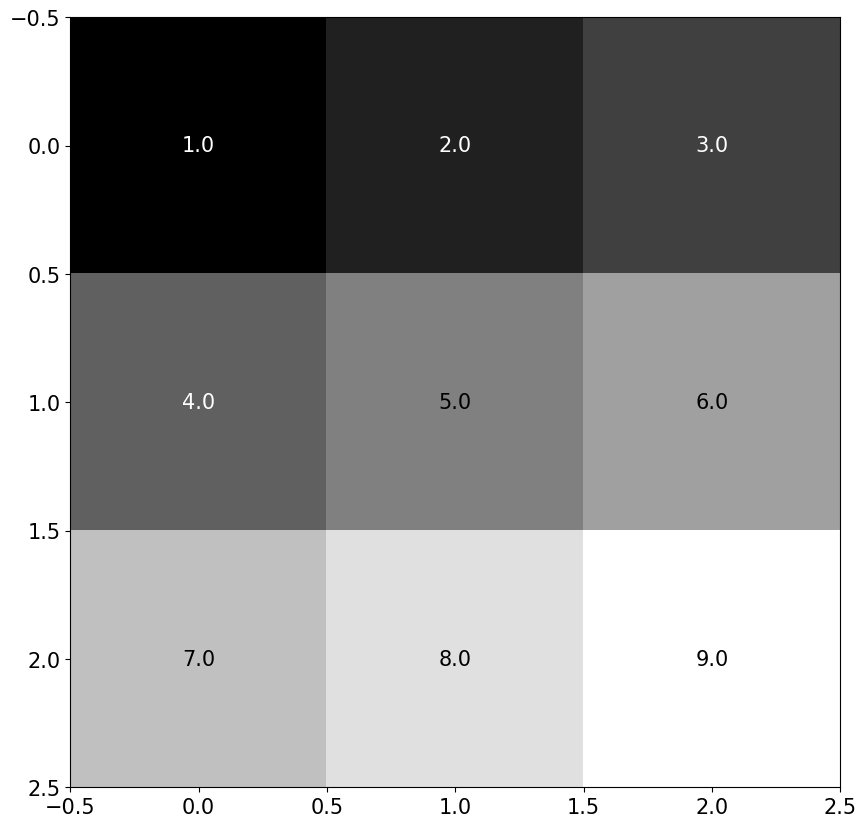

In [19]:
image = tf.constant([[[[1], [2], [3]], 
                     [[4], [5], [6]],
                     [[7], [8], [9]]]], dtype=np.float32)
fig, ax = plt.subplots()
ax.imshow(image.numpy().reshape(3, 3), cmap='gray')

for (j, i), label in np.ndenumerate(image.numpy().reshape(3, 3)):
    if label < image.numpy().mean():
        ax.text(i, j, label, ha='center', va='center', color='white')
    else:
        ax.text(i, j, label, ha='center', va='center', color='k')
plt.show()

In [20]:
print(image.shape)

(1, 3, 3, 1)


In [21]:
# Weight Initialization
weight = np.array([[[[1.]], [[1.]]],
                   [[[1.]], [[1.]]]])
weight_init = tf.constant_initializer(weight)
print("weight.shape: {}".format(weight.shape))

# Convolution layer
layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding='VALID', kernel_initializer=weight_init)
output = layer(image)

weight.shape: (2, 2, 1, 1)


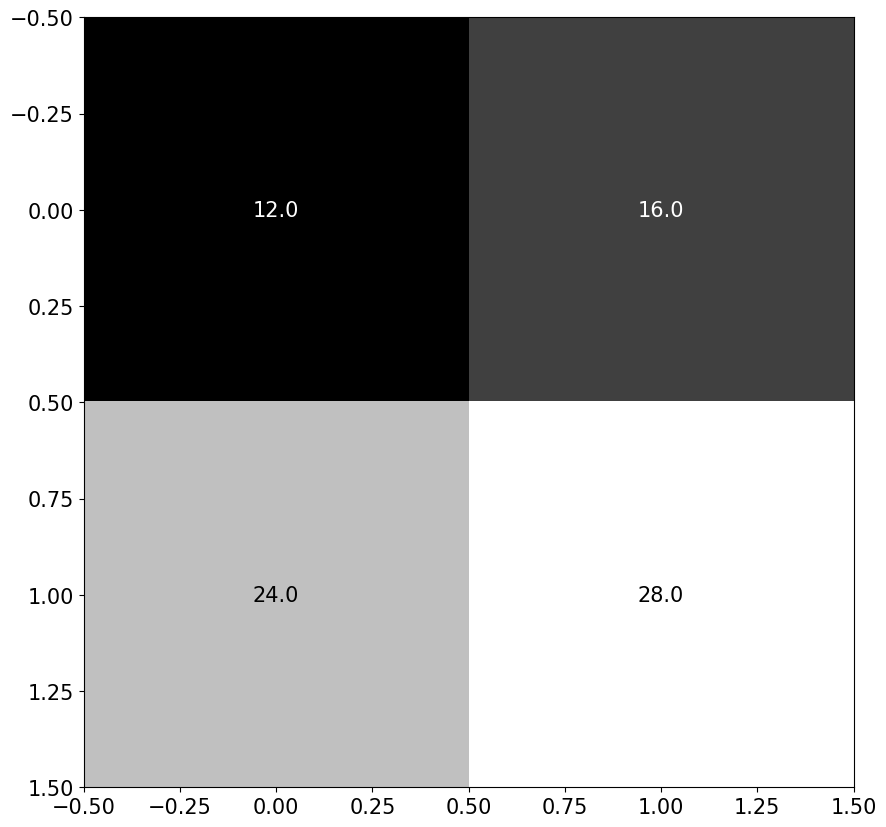

In [22]:
# Check the result
fig, ax = plt.subplots()
ax.imshow(output.numpy().reshape(2, 2), cmap='gray')
for (j, i), label in np.ndenumerate(output.numpy().reshape(2, 2)):
    if label < output.numpy().mean():
        ax.text(i, j, label, ha='center', va='center', color='white')
    else:
        ax.text(i, j, label, ha='center', va='center', color='k')

plt.show()

In [23]:
# Convolution layer with half padding
layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding='SAME', kernel_initializer=weight_init)
output2 = layer(image)

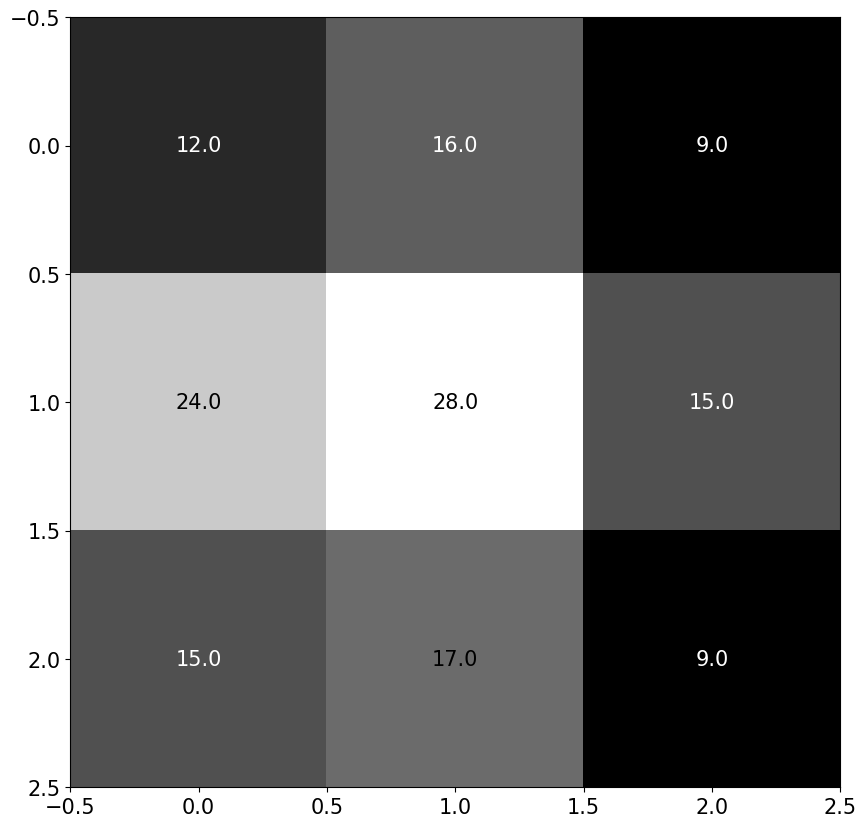

In [24]:
# Check the result
fig, ax = plt.subplots()
ax.imshow(output2.numpy().reshape(3, 3), cmap='gray')
for (j, i), label in np.ndenumerate(output2.numpy().reshape(3, 3)):
    if label < output2.numpy().mean():
        ax.text(i, j, label, ha='center', va='center', color='white')
    else:
        ax.text(i, j, label, ha='center', va='center', color='k')
plt.show()

Weight shape: (2, 2, 1, 3)


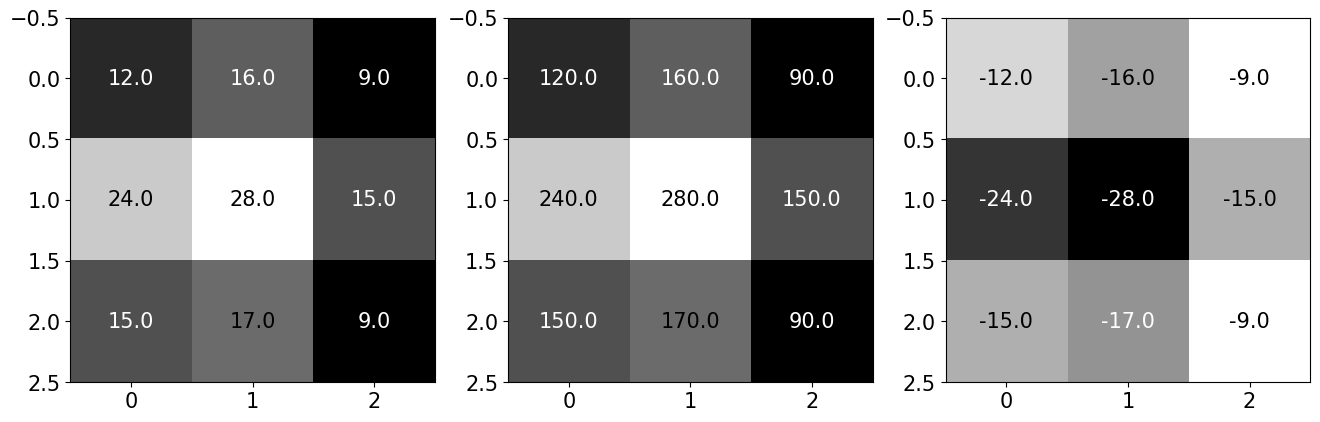

In [25]:
# Weight initialization
weight = np.array([[[[1., 10., -1.]], [[1., 10., -1.]]],
                   [[[1., 10., -1.]], [[1., 10., -1.]]]])
weight_init = tf.constant_initializer(weight)
print("Weight shape: {}".format(weight.shape))

# Convolution layer
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(2, 2), padding='SAME', kernel_initializer=weight_init)
output = layer(image)

## Check output
feature_maps = np.swapaxes(output, 0, 3)

fig, ax = plt.subplots(1, 3)
for x, feature_map in enumerate(feature_maps):
    ax[x].imshow(feature_map.reshape(3, 3), cmap='gray')
    for (j, i), label in np.ndenumerate(feature_map.reshape(3, 3)):
        if label < feature_map.mean():
            ax[x].text(i, j, label, ha='center', va='center', color='white')
        else:
            ax[x].text(i, j, label, ha='center', va='center', color='k')

In [26]:
# Sample image
image = tf.constant([[[[4.], [3.]],
                     [[2.], [1.]]]], dtype=np.float32)

In [27]:
# Max Pooling layer
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='VALID')
output = layer(image)

# Check the output
print(output.numpy())

[[[[4.]]]]


In [28]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='SAME')
output = layer(image)

print(output.numpy())

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


11490434/11490434 [==============================] - 0s 0us/step


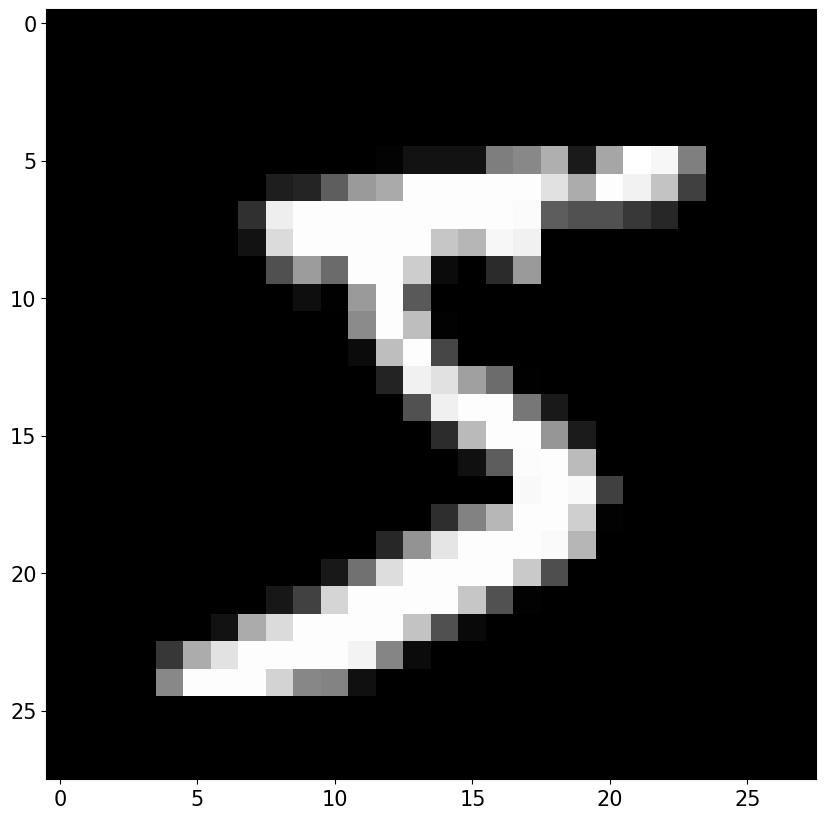

In [29]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalization
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

image = X_train[0]
plt.imshow(image, cmap='gray')
plt.show()

In [30]:
print("Dimension: {}".format(image.shape))
image = image[tf.newaxis, ..., tf.newaxis]
print("Dimension: {}".format(image.shape))

# Convert it to tensor
image = tf.convert_to_tensor(image)

Dimension: (28, 28)
Dimension: (1, 28, 28, 1)


In [31]:
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
layer_conv = tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), strides=(2, 2), padding='SAME',
                               kernel_initializer=weight_init)
output = layer_conv(image)
print(output.shape)

(1, 14, 14, 5)


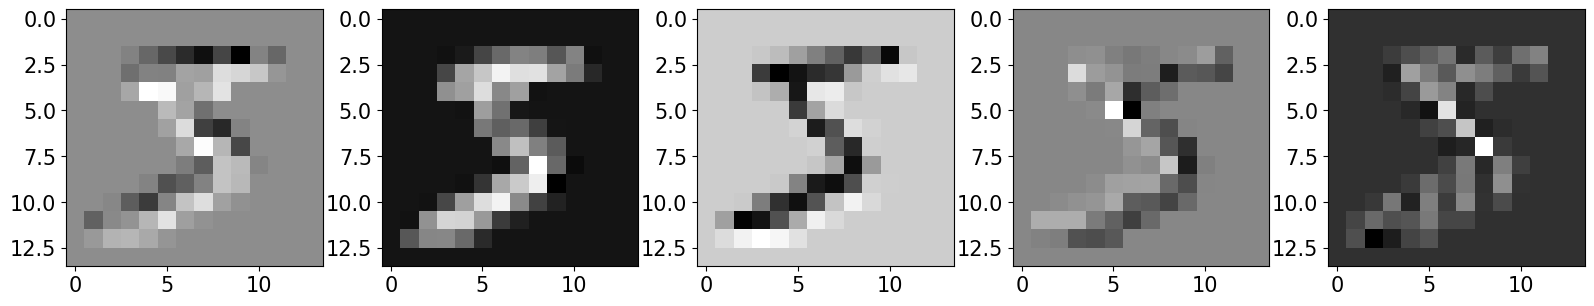

In [32]:
feature_maps = np.swapaxes(output, 0, 3)

fig, ax = plt.subplots(1, 5)
for i, feature_map in enumerate(feature_maps):
    ax[i].imshow(feature_map.reshape(14, 14), cmap='gray')
plt.tight_layout()
plt.show()

In [33]:
layer_pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output2 = layer_pool(output)
print(output2.shape)

(1, 7, 7, 5)


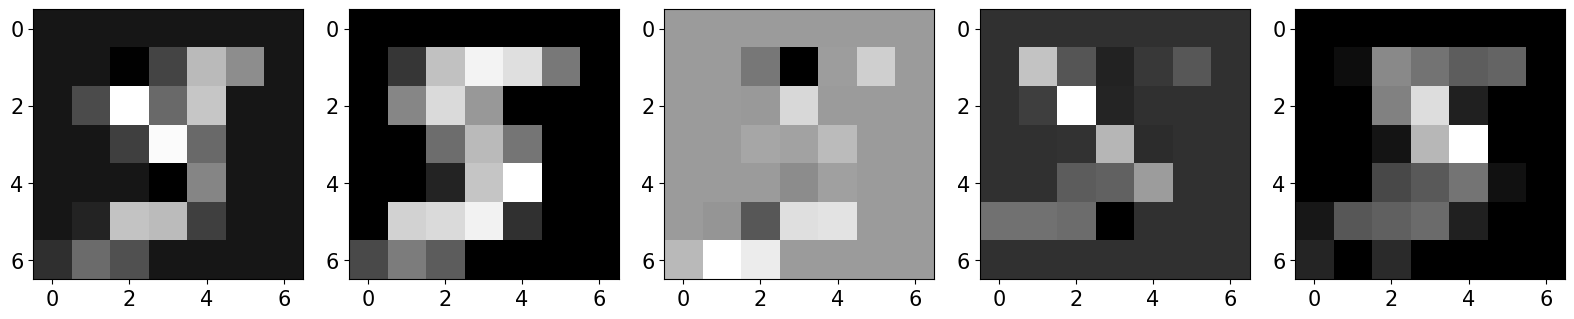

In [34]:
feature_maps = np.swapaxes(output2, 0, 3)

fig, ax = plt.subplots(1, 5)
for i, feature_map in enumerate(feature_maps):
    ax[i].imshow(feature_map.reshape(7, 7), cmap='gray')
plt.tight_layout()
plt.show()